In [1]:
# !pip install tf-models-official

In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import tensorflow as tf
# import tensorflow_models as tfm
import glob

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [4]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [5]:
# image_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/VGG_features/*'
# image_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/PNGImages/*'
# mask_directory = '/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/voc_multi_semantic_seg_dataset/SegmentationClassPNG/*'

# image_directory = '../voc_multi_semantic_seg_dataset/PNGImages/*'
# mask_directory = '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/*'

image_directory = '../VGG_features/*'
mask_directory = '../voc_multi_semantic_seg_dataset/SegmentationClassPNG/*'

In [6]:
image_names = glob.glob(image_directory)
image_names

['../VGG_features\\28-12-2022_13-57-46-0.png',
 '../VGG_features\\28-12-2022_13-57-46-1.png',
 '../VGG_features\\28-12-2022_13-57-46-10.png',
 '../VGG_features\\28-12-2022_13-57-46-11.png',
 '../VGG_features\\28-12-2022_13-57-46-12.png',
 '../VGG_features\\28-12-2022_13-57-46-13.png',
 '../VGG_features\\28-12-2022_13-57-46-14.png',
 '../VGG_features\\28-12-2022_13-57-46-15.png',
 '../VGG_features\\28-12-2022_13-57-46-16.png',
 '../VGG_features\\28-12-2022_13-57-46-17.png',
 '../VGG_features\\28-12-2022_13-57-46-18.png',
 '../VGG_features\\28-12-2022_13-57-46-19.png',
 '../VGG_features\\28-12-2022_13-57-46-2.png',
 '../VGG_features\\28-12-2022_13-57-46-20.png',
 '../VGG_features\\28-12-2022_13-57-46-21.png',
 '../VGG_features\\28-12-2022_13-57-46-22.png',
 '../VGG_features\\28-12-2022_13-57-46-23.png',
 '../VGG_features\\28-12-2022_13-57-46-24.png',
 '../VGG_features\\28-12-2022_13-57-46-25.png',
 '../VGG_features\\28-12-2022_13-57-46-26.png',
 '../VGG_features\\28-12-2022_13-57-46-27.p

In [7]:
mask_names = glob.glob(mask_directory)
mask_names

['../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_13-57-46.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-00-47.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-00.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-04.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-09.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-21.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-28.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-38.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-42.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-50.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-01-57.png',
 '../voc_multi_semantic_seg_dataset/SegmentationClassPNG\\28-12-2022_14-02-0

In [8]:
# mask_names = np.repeat(np.array(mask_names), 64, axis=0)

image_names.sort()
mask_names.sort()

# image_names = np.array(image_names)
# mask_names = np.array(mask_names)

# shuffle = np.random.permutation(len(image_names))
# image_names = image_names[shuffle]
# mask_names = mask_names[shuffle]

In [9]:
images = [cv2.imread(img, 0) for img in image_names]
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
# images = [cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA) for img in images]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis=3)

In [10]:
masks = [cv2.imread(mask, 0) for mask in mask_names]
# masks = [cv2.resize(mask, (256, 256), interpolation = cv2.INTER_AREA) for mask in masks]
# mask_dataset = np.array([np.repeat([mask], 64) for mask in masks])
mask_dataset = np.repeat(np.array(masks), 64, axis=0)
mask_dataset = np.array(mask_dataset)
mask_dataset = np.expand_dims(mask_dataset, axis=3)

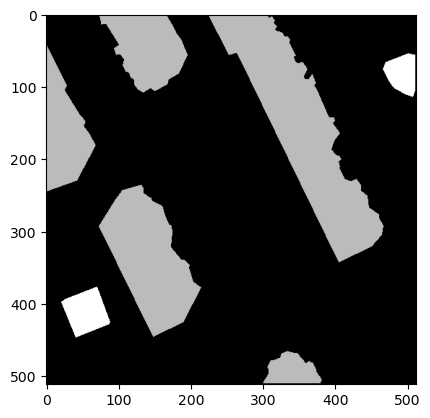

In [11]:
plt.imshow(mask_dataset[12, :, :, 0], cmap='gray')


In [12]:
# mask_labels = np.unique(mask_dataset)
# for mask in mask_dataset:
#     for i, val in enumerate(mask_labels):
#         mask[mask == val] = i
# print("Labels in the mask are : ", np.unique(mask_dataset))

In [13]:
#binary segmentation
for mask in mask_dataset:
    mask[mask > 0] = 1.
# print("Labels in the mask are : ", np.unique(mask_dataset))

In [14]:
# image_dataset = image_dataset / 255.
image_dataset = image_dataset.astype('float16')
for i in range(0, image_dataset.shape[0]):
    image_dataset[i] /= 255.
    # mask_dataset[i] = mask_dataset[i]/255.
    # print(i)

In [15]:
print(image_dataset.shape)
print(mask_dataset.shape)

(7936, 512, 512, 1)
(7936, 512, 512, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.25, random_state=42)

# test_size=0.15
# dataset_size = image_dataset.shape[0]

# X_train, X_test = image_dataset[:int(dataset_size*(1-test_size))], image_dataset[int(dataset_size*(1-test_size)):]
# y_train, y_test = mask_dataset[:int(dataset_size*(1-test_size))], mask_dataset[int(dataset_size*(1-test_size)):]

print(f"X_train: {X_train.shape}\t X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}\t y_test: {y_test.shape}")

X_train: (5952, 512, 512, 1)	 X_test: (1984, 512, 512, 1)
y_train: (5952, 512, 512, 1)	 y_test: (1984, 512, 512, 1)


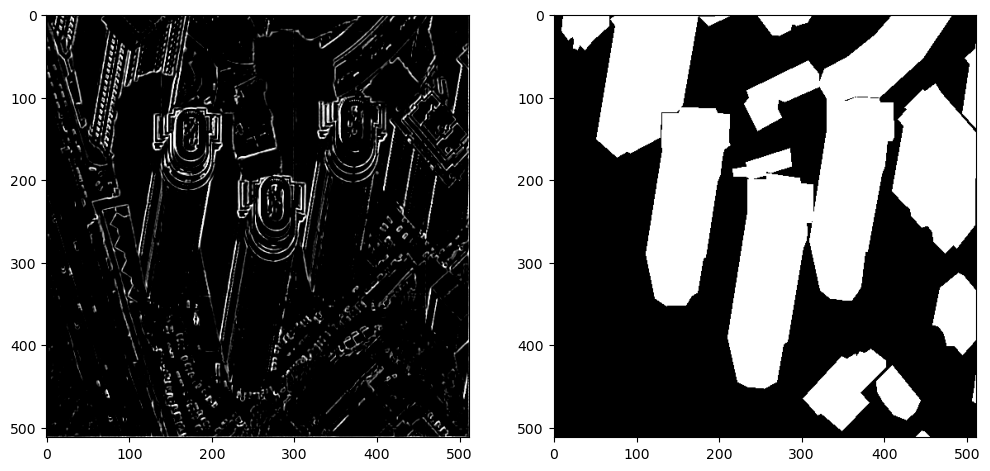

In [17]:
import random 

image_number = random.randint(0, len(X_train) - 1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number, :, :], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number, :, :], cmap='gray')
plt.show()

In [18]:
# #New generator with rotation and shear where interpolation that comes with rotation and shear are thresholded in masks.
# #This gives a binary mask rather than a mask with interpolated values.
# seed=24
# from keras.preprocessing.image import ImageDataGenerator

# img_data_gen_args = dict(rotation_range=90,
#                      width_shift_range=0.3,
#                      height_shift_range=0.3,
#                      shear_range=0.5,
#                      zoom_range=0.3,
#                      horizontal_flip=True,
#                      vertical_flip=True,
#                      fill_mode='reflect')

# mask_data_gen_args = dict(rotation_range=90,
#                      width_shift_range=0.3,
#                      height_shift_range=0.3,
#                      shear_range=0.5,
#                      zoom_range=0.3,
#                      horizontal_flip=True,
#                      vertical_flip=True,
#                      fill_mode='reflect',
#                      preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again.

In [19]:
# image_data_generator = ImageDataGenerator(**img_data_gen_args)
# image_data_generator.fit(X_train, augment=True, seed=seed)
# image_generator = image_data_generator.flow(X_train, seed=seed, batch_size=2)
# valid_img_generator = image_data_generator.flow(X_test, seed=seed, batch_size=2)

In [20]:
# mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
# mask_data_generator.fit(y_train, augment=True, seed=seed)
# mask_generator = mask_data_generator.flow(y_train, seed=seed, batch_size=2)
# valid_mask_generator = mask_data_generator.flow(y_test, seed=seed, batch_size=2)

In [21]:
# def my_image_mask_generator(image_generator, mask_generator):
#     train_generator = zip(image_generator, mask_generator)
#     for (img, mask) in train_generator:
#         yield (img, mask)

# my_generator = my_image_mask_generator(image_generator, mask_generator)

In [22]:
# validation_datagen = my_image_mask_generator(valid_img_generator, valid_mask_generator)

In [23]:
# x = image_generator.next()
# y = mask_generator.next()
# for i in range(0,1):
#     image = x[i]
#     mask = y[i]
#     plt.subplot(1,2,1)
#     plt.imshow(image[:,:,0], cmap='gray')
#     plt.subplot(1,2,2)
#     plt.imshow(mask[:,:,0], cmap='gray')
#     plt.show()

In [24]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K



'''
A few useful metrics and losses
'''

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [25]:
'''
Useful blocks to build Unet

conv - BN - Activation - conv - BN - Activation - Dropout (if enabled)

'''


def conv_block(x, filter_size, size, dropout, batch_norm=False):
    
    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)

    conv = layers.Conv2D(size, (filter_size, filter_size), padding="same")(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation("relu")(conv)
    
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    return conv


def repeat_elem(tensor, rep):
    # lambda function to repeat Repeats the elements of a tensor along an axis
    #by a factor of rep.
    # If tensor has shape (None, 256,256,3), lambda will return a tensor of shape 
    #(None, 256,256,6), if specified axis=3 and rep=2.

     return layers.Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3),
                          arguments={'repnum': rep})(tensor)


def res_conv_block(x, filter_size, filter_num, dropout, batch_norm=False):
    '''
    Residual convolutional layer.
    Two variants....
    Either put activation function before the addition with shortcut
    or after the addition (which would be as proposed in the original resNet).
    
    1. conv - BN - Activation - conv - BN - Activation 
                                          - shortcut  - BN - shortcut+BN
                                          
    2. conv - BN - Activation - conv - BN   
                                     - shortcut  - BN - shortcut+BN - Activation                                     
    
    Check fig 4 in https://arxiv.org/ftp/arxiv/papers/1802/1802.06955.pdf
    '''

    conv = layers.Conv2D(filter_num, (filter_size, filter_size), padding='same')(x)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    conv = layers.Activation('relu')(conv)
    
    conv = layers.Conv2D(filter_num, (filter_size, filter_size), padding='same')(conv)
    if batch_norm is True:
        conv = layers.BatchNormalization(axis=3)(conv)
    #conv = layers.Activation('relu')(conv)    #Activation before addition with shortcut
    if dropout > 0:
        conv = layers.Dropout(dropout)(conv)

    shortcut = layers.Conv2D(filter_num, kernel_size=(1, 1), padding='same')(x)
    if batch_norm is True:
        shortcut = layers.BatchNormalization(axis=3)(shortcut)

    res_path = layers.add([shortcut, conv])
    res_path = layers.Activation('relu')(res_path)    #Activation after addition with shortcut (Original residual block)
    return res_path

def gating_signal(input, out_size, batch_norm=False):
    """
    resize the down layer feature map into the same dimension as the up layer feature map
    using 1x1 conv
    :return: the gating feature map with the same dimension of the up layer feature map
    """
    x = layers.Conv2D(out_size, (1, 1), padding='same')(input)
    if batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def attention_block(x, gating, inter_shape):
    shape_x = K.int_shape(x)
    shape_g = K.int_shape(gating)

# Getting the x signal to the same shape as the gating signal
    theta_x = layers.Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same')(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

# Getting the gating signal to the same number of filters as the inter_shape
    phi_g = layers.Conv2D(inter_shape, (1, 1), padding='same')(gating)
    upsample_g = layers.Conv2DTranspose(inter_shape, (3, 3),
                                 strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),
                                 padding='same')(phi_g)  # 16

    concat_xg = layers.add([upsample_g, theta_x])
    act_xg = layers.Activation('relu')(concat_xg)
    psi = layers.Conv2D(1, (1, 1), padding='same')(act_xg)
    sigmoid_xg = layers.Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = layers.UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = repeat_elem(upsample_psi, shape_x[3])

    y = layers.multiply([upsample_psi, x])

    result = layers.Conv2D(shape_x[3], (1, 1), padding='same')(y)
    result_bn = layers.BatchNormalization()(result)
    return result_bn

In [26]:
def ASPP(inputs, num_filters, regularization=False):
    if regularization:
        kernel_regularizer = regularizers.l2(0.01)
    else:
      kernel_regularizer = None
    # """ Image Pooling """
    # shape = inputs.shape
    # y1 = tf.keras.layers.AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    # y1 = tf.keras.layers.Conv2D(num_filters, 1, padding="same", use_bias=False, kernel_regularizer=kernel_regularizer)(y1)
    # y1 = tf.keras.layers.BatchNormalization()(y1)
    # y1 = tf.keras.layers.Activation("relu")(y1)
    # y1 = tf.keras.layers.UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = tf.keras.layers.Conv2D(num_filters, 1, padding="same", use_bias=False, kernel_regularizer=kernel_regularizer)(inputs)
    y2 = tf.keras.layers.BatchNormalization()(y2)
    y2 = tf.keras.layers.Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = tf.keras.layers.Conv2D(num_filters, 3, padding="same", use_bias=False, dilation_rate=6, kernel_regularizer=kernel_regularizer)(inputs)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    y3 = tf.keras.layers.Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = tf.keras.layers.Conv2D(num_filters, 3, padding="same", use_bias=False, dilation_rate=12, kernel_regularizer=kernel_regularizer)(inputs)
    y4 = tf.keras.layers.BatchNormalization()(y4)
    y4 = tf.keras.layers.Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = tf.keras.layers.Conv2D(num_filters, 3, padding="same", use_bias=False, dilation_rate=18, kernel_regularizer=kernel_regularizer)(inputs)
    y5 = tf.keras.layers.BatchNormalization()(y5)
    y5 = tf.keras.layers.Activation("relu")(y5)

    y = tf.keras.layers.Concatenate()([y2, y3, y4, y5])
    y = tf.keras.layers.Conv2D(num_filters, 1, padding="same", use_bias=False, kernel_regularizer=kernel_regularizer)(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.Activation("relu")(y)

    return y


In [27]:
# WEIGHTS_AUG
def Attention_ResUNet(input_shape, NUM_CLASSES=1, dropout_rate=0., batch_norm=True):
    '''
    Rsidual UNet, with attention 
    
    '''
    # network structure
    FILTER_NUM = 64 # number of basic filters for the first layer
    FILTER_SIZE = 3 # size of the convolutional filter
    UP_SAMP_SIZE = 2 # size of upsampling filters
    # input data
    # dimension of the image depth
    inputs = layers.Input(input_shape, dtype=tf.float16)
    axis = 3

    #DownRes0
    padding_0 = layers.ZeroPadding2D(padding=(3, 3))(inputs)
    down_conv = layers.Conv2D(filters=64, kernel_size=7, strides=(2,2))(padding_0)

    # Downsampling layers
    # DownRes 1, double residual convolution + pooling
    conv_256 = res_conv_block(down_conv, FILTER_SIZE, 256, dropout_rate, batch_norm)
    pool_128 = layers.MaxPooling2D(pool_size=(2,2))(conv_256)
    # DownRes 2
    conv_128 = res_conv_block(pool_128, FILTER_SIZE, 512, dropout_rate, batch_norm)
    pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
    # DownRes 3
    conv_64 = res_conv_block(pool_64, FILTER_SIZE, 1024, dropout_rate, batch_norm)
    pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
    # DownRes 4
    conv_32 = res_conv_block(pool_32, FILTER_SIZE, 2048, dropout_rate, batch_norm)
    # pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_32)
    # # DownRes 5, convolution only
    # conv_32 = res_conv_block(pool_32, FILTER_SIZE, 1024, dropout_rate, batch_norm)

    # Upsampling layers
    # UpRes 6, attention gated concatenation + upsampling + double residual convolution
    gating_64 = gating_signal(conv_32, 512, batch_norm)
    att_64 = attention_block(conv_64, gating_64, 512)
    up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_32)
    up_64 = layers.concatenate([up_64, att_64], axis=axis)
    up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 512, dropout_rate, batch_norm)
    # UpRes 7
    gating_128 = gating_signal(up_conv_64, 64, batch_norm)
    att_128 = attention_block(conv_128, gating_128, 64)
    up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    up_128 = layers.concatenate([up_128, att_128], axis=axis)
    up_conv_128 = res_conv_block(up_128, FILTER_SIZE, 64, dropout_rate, batch_norm)
    # UpRes 8
    gating_256 = gating_signal(up_conv_128, 64, batch_norm)
    att_256 = attention_block(conv_256, gating_256, 64)
    up_256 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_128)
    up_256 = layers.concatenate([up_256, att_256], axis=axis)
    up_conv_256 = res_conv_block(up_256, FILTER_SIZE, 64, dropout_rate, batch_norm)
    # # UpRes 9
    # gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
    # att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
    # up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
    # up_128 = layers.concatenate([up_128, att_128], axis=axis)
    # up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

    #UpResTranspose
    up_conv_512 = layers.Conv2DTranspose(64, FILTER_SIZE, strides=(2,2), padding='same')(up_conv_256)


    # 1*1 convolutional layers
    
    conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_512)
    conv_final = layers.BatchNormalization(axis=axis)(conv_final)
    conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

    # Model integration
    model = models.Model(inputs, conv_final, name="AttentionResUNet")
    return model

In [28]:
# def Attention_ResUNet(input_shape, NUM_CLASSES=1, dropout_rate=0.0, batch_norm=True):
#     '''
#     Rsidual UNet, with attention 
    
#     '''
#     # network structure
#     FILTER_NUM = 64 # number of basic filters for the first layer
#     FILTER_SIZE = 3 # size of the convolutional filter
#     UP_SAMP_SIZE = 2 # size of upsampling filters
#     # input data
#     # dimension of the image depth
#     inputs = layers.Input(input_shape, dtype=tf.float16)
#     axis = 3

#     #DownRes0
#     padding_0 = layers.ZeroPadding2D(padding=(3, 3))(inputs)
#     down_conv = layers.Conv2D(filters=64, kernel_size=7, strides=(2,2))(padding_0)

#     # Downsampling layers
#     # DownRes 1, double residual convolution + pooling
#     conv_256 = res_conv_block(down_conv, FILTER_SIZE, 256, dropout_rate, batch_norm)
#     pool_128 = layers.MaxPooling2D(pool_size=(2,2))(conv_256)
#     # DownRes 2
#     conv_128 = res_conv_block(pool_128, FILTER_SIZE, 512, dropout_rate, batch_norm)
#     pool_64 = layers.MaxPooling2D(pool_size=(2,2))(conv_128)
#     # DownRes 3
#     conv_64 = res_conv_block(pool_64, FILTER_SIZE, 1024, dropout_rate, batch_norm)
#     pool_32 = layers.MaxPooling2D(pool_size=(2,2))(conv_64)
#     # DownRes 4
#     conv_32_1 = res_conv_block(pool_32, FILTER_SIZE, 2048, dropout_rate, batch_norm)
#     aspp_32 = ASPP(conv_32_1, 1024, True)
#     conv_32_2 = res_conv_block(aspp_32, FILTER_SIZE, 1024, dropout_rate, batch_norm)

#     # Upsampling layers
#     # UpRes 6, attention gated concatenation + upsampling + double residual convolution
#     gating_64 = gating_signal(conv_32_2, 512, batch_norm)
#     att_64 = attention_block(conv_64, gating_64, 512)
#     up_64 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(conv_32_2)
#     up_64 = layers.concatenate([up_64, att_64], axis=axis)
#     up_conv_64 = res_conv_block(up_64, FILTER_SIZE, 512, dropout_rate, batch_norm)
#     # UpRes 7
#     gating_128 = gating_signal(up_conv_64, 64, batch_norm)
#     att_128 = attention_block(conv_128, gating_128, 64)
#     up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
#     up_128 = layers.concatenate([up_128, att_128], axis=axis)
#     up_conv_128 = res_conv_block(up_128, FILTER_SIZE, 64, dropout_rate, batch_norm)
#     # UpRes 8
#     gating_256 = gating_signal(up_conv_128, 64, batch_norm)
#     att_256 = attention_block(conv_256, gating_256, 64)
#     up_256 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_128)
#     up_256 = layers.concatenate([up_256, att_256], axis=axis)
#     up_conv_256 = res_conv_block(up_256, FILTER_SIZE, 64, dropout_rate, batch_norm)
#     # # UpRes 9
#     # gating_128 = gating_signal(up_conv_64, FILTER_NUM, batch_norm)
#     # att_128 = attention_block(conv_128, gating_128, FILTER_NUM)
#     # up_128 = layers.UpSampling2D(size=(UP_SAMP_SIZE, UP_SAMP_SIZE), data_format="channels_last")(up_conv_64)
#     # up_128 = layers.concatenate([up_128, att_128], axis=axis)
#     # up_conv_128 = res_conv_block(up_128, FILTER_SIZE, FILTER_NUM, dropout_rate, batch_norm)

#     #UpResTranspose
#     up_conv_512 = layers.Conv2DTranspose(64, FILTER_SIZE, strides=(2,2), padding='same')(up_conv_256)


#     # 1*1 convolutional layers
    
#     conv_final = layers.Conv2D(NUM_CLASSES, kernel_size=(1,1))(up_conv_512)
#     conv_final = layers.BatchNormalization(axis=axis)(conv_final)
#     conv_final = layers.Activation('sigmoid')(conv_final)  #Change to softmax for multichannel

#     # Model integration
#     model = models.Model(inputs, conv_final, name="AttentionResUNet")
#     return model

In [29]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]
num_labels = 1  #Binary
input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
batch_size = 2

In [30]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    # filepath='/content/drive/MyDrive/Colab Notebooks/SatelliteBuildingRecognition/saved_models/checkpoints/ag_resnet_Sreeni/weights.{epoch:02d}.hdf5',
    filepath='../saved_models/ag_resnet_unet_aspp_Sreeni/weights_attention_VGG.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    # monitor='val_accuracy',
    save_best_only=True,
    save_freq='epoch',
    verbose=1)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
                                                           monitor='val_loss',
                                                          #  monitor='val_accuracy',
                                                           min_delta=0,
                                                           patience=5)

In [31]:
'''
Attention Residual Unet
'''
att_res_unet_model = Attention_ResUNet(input_shape)

att_res_unet_model.compile(optimizer=Adam(learning_rate=1e-3),
                           loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0), 
                           # loss=jacard_coef_loss,
                           # loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=['accuracy', jacard_coef])

att_res_unet_model.summary()

Model: "AttentionResUNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 518, 518, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  3200        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                   

In [35]:
from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train, y_train, 2)
test_gen = DataGenerator(X_test, y_test, 2)

In [ ]:
# att_res_unet_history = att_res_unet_model.fit(X_train, y_train, 
#                                               verbose=1,
#                                               batch_size = batch_size,
#                                               validation_data=(X_test, y_test ), 
#                                               callbacks=[early_stopping_callback, 
#                                                          model_checkpoint_callback],
#                                               shuffle=False,
#                                               epochs=1000)
att_res_unet_history = att_res_unet_model.fit(
                                              # X_train, y_train,
                                              train_gen,
                                              # my_generator,
                                              batch_size=batch_size,
                                              verbose=1,
                                              epochs=1000,
                                              validation_data=test_gen,
                                              # validation_data=(X_test, y_test),
                                              # validation_data=validation_datagen,
                                              # steps_per_epoch=len(X_train) * 2,
                                              # validation_steps=len(X_train) // 1,
                                              callbacks=[early_stopping_callback,
                                                        model_checkpoint_callback],
                                              shuffle=False)

Epoch 1/1000
2976/2976 [==============================] - ETA: 0s - loss: 0.1394 - accuracy: 0.7422 - jacard_coef: 0.2247

In [ ]:
att_res_unet_model.load_weights('../saved_models/ag_resnet_unet_aspp_Sreeni\weights_attention_VGG.hdf5')

In [ ]:
y_pred=att_res_unet_model.predict(X_test[:15])
y_pred_thresholded = y_pred > 0.5
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test[:15])
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = att_res_unet_history.history['loss']
val_loss = att_res_unet_history.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.ylim([0,3])
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = att_res_unet_history.history['accuracy']
val_acc = att_res_unet_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (att_res_unet_model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,:])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()